In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import json
import random

%matplotlib inline
random.seed(0)

In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [6]:
with open('sarcasm.json') as ds_json:
    ds = json.load(ds_json)

print('Number of examples:', len(ds))

sentences = []
labels = []

for ex in ds:
  sentences.append(ex['headline'])
  labels.append(ex['is_sarcastic'])

train_sentences = sentences[:training_size]
test_sentences = sentences[training_size:]
train_labels = labels[:training_size]
test_labels = labels[training_size:]

Number of examples: 26709


In [0]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [8]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation=tf.nn.relu),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 43,009
Trainable params: 43,009
Non-trainable params: 0
____________________________________________________

In [9]:
train_pad_sequences = np.array(train_pad_sequences)
train_labels = np.array(train_labels)
test_pad_sequences = np.array(test_pad_sequences)
test_labels = np.array(test_labels)
history_1 = model_1.fit(train_pad_sequences, train_labels, epochs=75, validation_data=(test_pad_sequences, test_labels), verbose=1)

Train on 20000 samples, validate on 6709 samples
Epoch 1/75
20000/20000 [==============================] - 7s 372us/sample - loss: 0.6926 - accuracy: 0.5627 - val_loss: 0.6108 - val_accuracy: 0.7117
Epoch 2/75
20000/20000 [==============================] - 7s 348us/sample - loss: 0.5724 - accuracy: 0.7706 - val_loss: 0.5554 - val_accuracy: 0.7743
Epoch 3/75
20000/20000 [==============================] - 7s 354us/sample - loss: 0.5295 - accuracy: 0.7859 - val_loss: 0.5232 - val_accuracy: 0.7857
Epoch 4/75
20000/20000 [==============================] - 7s 348us/sample - loss: 0.4960 - accuracy: 0.8012 - val_loss: 0.5009 - val_accuracy: 0.7945
Epoch 5/75
20000/20000 [==============================] - 7s 351us/sample - loss: 0.4774 - accuracy: 0.8084 - val_loss: 0.4849 - val_accuracy: 0.7985
Epoch 6/75
20000/20000 [==============================] - 7s 356us/sample - loss: 0.4614 - accuracy: 0.8143 - val_loss: 0.4694 - val_accuracy: 0.8085
Epoch 7/75
20000/20000 [===========================

In [10]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.001))),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 36,993
Trainable params: 36,993
Non-trainable params: 0
_________________________________________________________________


In [11]:
history_2 = model_2.fit(train_pad_sequences, train_labels, epochs=15, validation_data=(test_pad_sequences, test_labels), verbose=1)

Train on 20000 samples, validate on 6709 samples
Epoch 1/15
20000/20000 [==============================] - 46s 2ms/sample - loss: 0.5037 - accuracy: 0.7594 - val_loss: 0.4182 - val_accuracy: 0.8156
Epoch 2/15
20000/20000 [==============================] - 43s 2ms/sample - loss: 0.3880 - accuracy: 0.8310 - val_loss: 0.4173 - val_accuracy: 0.8135
Epoch 3/15
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.3713 - accuracy: 0.8391 - val_loss: 0.3926 - val_accuracy: 0.8250
Epoch 4/15
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.3506 - accuracy: 0.8497 - val_loss: 0.3867 - val_accuracy: 0.8264
Epoch 5/15
20000/20000 [==============================] - 43s 2ms/sample - loss: 0.3377 - accuracy: 0.8573 - val_loss: 0.3914 - val_accuracy: 0.8268
Epoch 6/15
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.3294 - accuracy: 0.8590 - val_loss: 0.3926 - val_accuracy: 0.8299
Epoch 7/15
20000/20000 [==============================] -

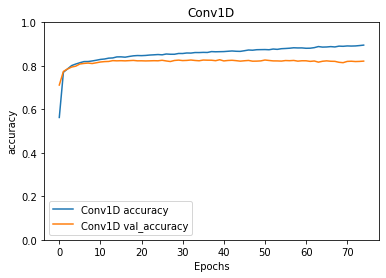

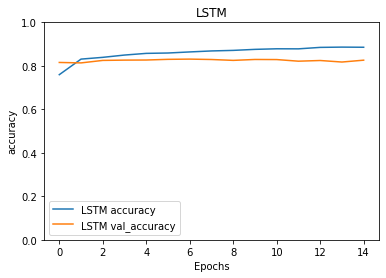

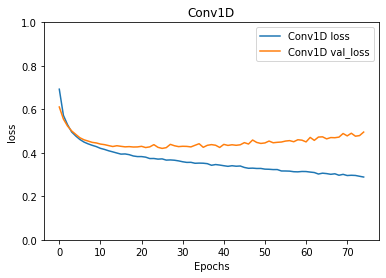

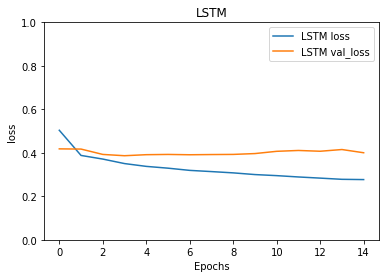

In [12]:
def plot_graphs(history, label, string):
    plt.ylim(top=1, bottom=0)
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.title(label[:-1])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([label+string, label+'val_'+string])
    plt.show()

plot_graphs(history_1, 'Conv1D ', 'accuracy')
plot_graphs(history_2,  'LSTM ','accuracy')

plot_graphs(history_1, 'Conv1D ', 'loss')
plot_graphs(history_2,  'LSTM ','loss')

In [0]:
predictions_1 = model_1.predict(test_pad_sequences) > 0.5
predictions_2 = model_2.predict(test_pad_sequences) > 0.5

In [0]:
confurion_matrix_1 = tf.math.confusion_matrix(test_labels, predictions_1)
confurion_matrix_2 = tf.math.confusion_matrix(test_labels, predictions_2)

In [15]:
print('Conv1D:')
print(confurion_matrix_1.numpy())
print('LSTM:')
print(confurion_matrix_2.numpy())

Conv1D:
[[3144  635]
 [ 561 2369]]
LSTM:
[[3224  555]
 [ 612 2318]]


In [16]:
loss_1, accuracy_1 = model_1.evaluate(test_pad_sequences, test_labels, verbose=1)
loss_2, accuracy_2 = model_2.evaluate(test_pad_sequences, test_labels, verbose=1)

6709/6709 [==============================] - 4s 609us/sample - loss: 0.4003 - accuracy: 0.8261


In [17]:
print(f'Conv1D:\nLoss: {loss_1:.4f}\tAccuracy: {accuracy_1:.2%}')
print(f'LSTM:\nLoss: {loss_2:.4f}\tAccuracy: {accuracy_2}')

Conv1D:
Loss: 0.4955	Accuracy: 82.17%
LSTM:
Loss: 0.4003	Accuracy: 0.826054573059082


In [0]:
model_1.save('Conv1D.h5')
model_2.save('LSTM.h5')